In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from functools import partial
import matplotlib.pyplot as plt


In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train_re= X_train.reshape(55000,28,28,1)
X_valid_re= X_valid.reshape(5000,28,28,1)
print(y_test.shape)
X_test_re=X_test.reshape(10000,28,28,1)
X_new = X_test_re[:10]

(10000,)


In [4]:
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=2, activation='relu', padding="SAME")

In [5]:
model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train_re, y_train, epochs=10, validation_data=(X_valid_re, y_valid),callbacks=[callback])
score = model.evaluate(X_test_re, y_test)


Epoch 1/10
1719/1719 [==============================] - 51s 10ms/step - loss: 0.6511 - accuracy: 0.7907 - val_loss: 0.0560 - val_accuracy: 0.9838
Epoch 2/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.1294 - accuracy: 0.9683 - val_loss: 0.0491 - val_accuracy: 0.9870
Epoch 3/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.0917 - accuracy: 0.9789 - val_loss: 0.0465 - val_accuracy: 0.9880
Epoch 4/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.0725 - accuracy: 0.9828 - val_loss: 0.0379 - val_accuracy: 0.9912
Epoch 5/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.0666 - accuracy: 0.9839 - val_loss: 0.0330 - val_accuracy: 0.9932
Epoch 6/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.0477 - accuracy: 0.9882 - val_loss: 0.0395 - val_accuracy: 0.9920
Epoch 7/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.0489 - accuracy: 0.9886 - val_loss: 0.0472 -

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       32896     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       65664     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         131328    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         2

In [12]:
y_pred=model.predict(X_new)

In [13]:
print(y_pred)

[[2.01628674e-19 9.70761579e-12 1.52547708e-09 2.10079096e-14
  2.00426088e-13 3.46317193e-20 3.44244579e-17 1.00000000e+00
  3.62362770e-15 1.24019284e-08]
 [1.66447672e-21 1.13856320e-10 1.00000000e+00 2.64430784e-13
  1.02379695e-14 6.02240800e-21 2.01349303e-15 4.48260179e-12
  2.28716189e-13 6.08353952e-17]
 [2.41070303e-20 1.00000000e+00 8.77204346e-15 1.12579516e-20
  5.89221211e-16 1.12077803e-19 3.01606595e-17 1.71918144e-13
  4.86665124e-13 1.44443989e-15]
 [1.00000000e+00 3.26668389e-18 5.96883339e-17 1.10224981e-18
  5.50028341e-15 1.07938980e-17 8.87211346e-11 6.18516693e-17
  4.82887114e-13 7.47042571e-15]
 [2.13283858e-13 4.05562167e-10 1.04311212e-11 6.91195868e-15
  9.99968290e-01 6.09559874e-14 6.59295418e-09 4.37827152e-09
  1.23748289e-09 3.17468548e-05]
 [2.17510510e-22 1.00000000e+00 1.06451428e-16 4.19095987e-23
  1.84552763e-17 5.13861621e-22 2.69336987e-19 3.98120351e-15
  5.39468271e-14 3.90614769e-17]
 [3.38293749e-09 3.37805687e-07 6.95676539e-09 1.87581853e

TypeError: ignored

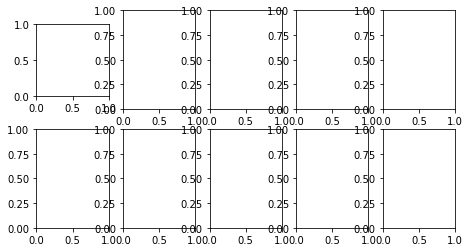

In [17]:
num = 10
images = X_new[:10]
labels = y_pred[:10]

num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()